<a href="https://colab.research.google.com/github/tharamalu/Portfolio/blob/main/Image_Processing_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

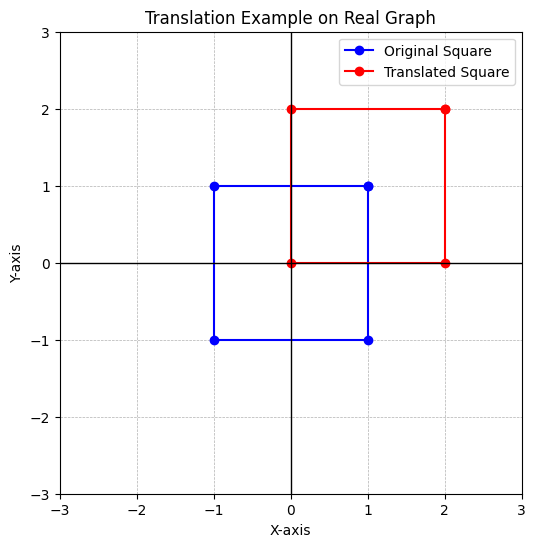

In [1]:
#@title 1. Translation

import numpy as np
import matplotlib.pyplot as plt

# Define a square centered at origin
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Translation values
tx, ty = 1, 1  # shift right by 1, up by 1

# Apply translation
translated_square = square + np.array([tx, ty])

# Plot like a real Cartesian graph
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(translated_square[:,0], translated_square[:,1], 'r-o', label="Translated Square")

# Draw X and Y axes
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)

# Add grid like graph paper
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set axis limits for better view
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Translation Example on Real Graph")
plt.legend()
plt.show()


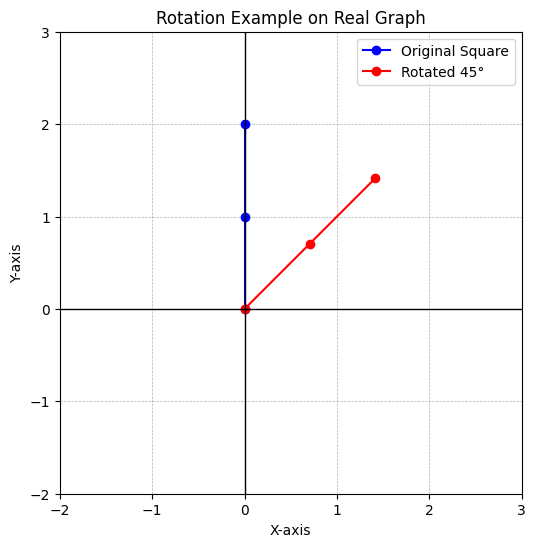

In [2]:
#@title 2. Rotation

import numpy as np
import matplotlib.pyplot as plt

# Define a square (4 corners, closed loop)
square = np.array([[0,0],[0,1],[0,2]])

# Rotation angle in degrees
angle_deg = 45
theta = np.deg2rad(angle_deg)   # convert degrees → radians

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])

# Rotate square around origin
rotated_square = square @ R.T

# Plot like a real coordinate graph
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(rotated_square[:,0], rotated_square[:,1], 'r-o', label=f"Rotated {angle_deg}°")

# Draw X and Y axes
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)

# Add grid like graph paper
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set axis limits for better view
plt.xlim(-2, 3)
plt.ylim(-2, 3)

# Set equal aspect ratio (so square looks like square)
plt.gca().set_aspect('equal', adjustable='box')

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation Example on Real Graph")
plt.legend()
plt.show()


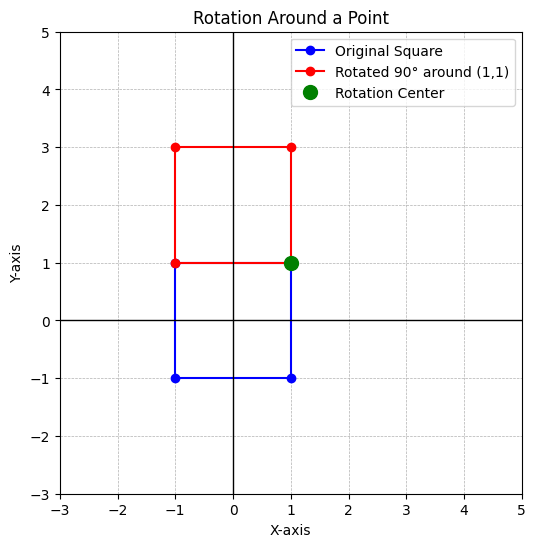

In [3]:
#@title 3. Rotate based on some point

import numpy as np
import matplotlib.pyplot as plt

# Define a square (centered at origin for simplicity)
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Rotation angle (degrees → radians)
angle_deg = 90
theta = np.deg2rad(angle_deg)

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])

# Point around which to rotate (example: (2, 1))
cx, cy = 1, 1

# Apply rotation around point (cx, cy)
rotated_square = (square - np.array([cx, cy])) @ R.T + np.array([cx, cy])

# Plot
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(rotated_square[:,0], rotated_square[:,1], 'r-o', label=f"Rotated {angle_deg}° around ({cx},{cy})")

# Mark rotation center
plt.plot(cx, cy, 'go', markersize=10, label="Rotation Center")

# Draw X and Y axes
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)

# Grid + equal aspect
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Axis limits
plt.xlim(-3, 5)
plt.ylim(-3, 5)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation Around a Point")
plt.legend()
plt.show()


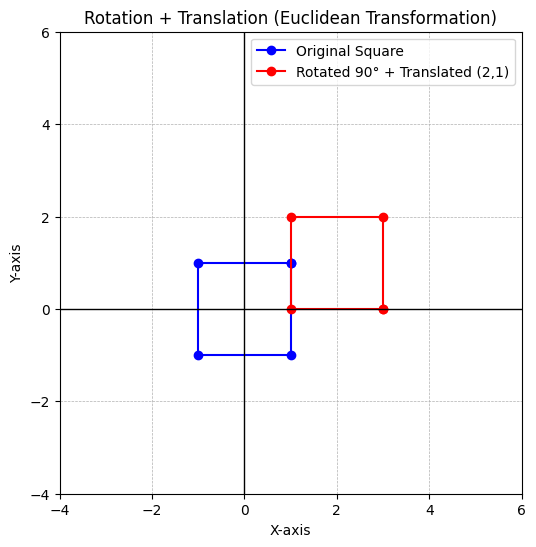

In [4]:
#@title 4. Euclidean Transformation(Rotation + Translation)
import numpy as np
import matplotlib.pyplot as plt

# Define a square (centered at origin)
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Rotation angle (degrees → radians)
angle_deg = 90
theta = np.deg2rad(angle_deg)

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])

# Translate values
tx, ty = 2, 1   # shift right by 2, up by 1

# Step 1: Rotate around origin
rotated_square = square @ R.T

# Step 2: Apply translation
transformed_square = rotated_square + np.array([tx, ty])

# Plot
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(transformed_square[:,0], transformed_square[:,1], 'r-o',
         label=f"Rotated {angle_deg}° + Translated ({tx},{ty})")

# Draw axes
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)

# Grid + equal aspect
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Axis limits
plt.xlim(-4, 6)
plt.ylim(-4, 6)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation + Translation (Euclidean Transformation)")
plt.legend()
plt.show()



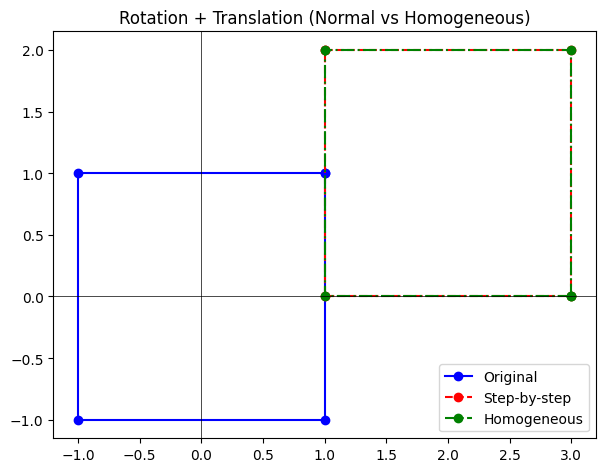

In [5]:
#@title 5. Homogeneos Coordinates

import numpy as np
import matplotlib.pyplot as plt

# Define a square
square = np.array([[1,1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Parameters
angle_deg = 90
theta = np.deg2rad(angle_deg)    # 90 degree rotation
tx, ty = 2, 1       # translation (shift right 2, up 1)

# ------------------------------
# 1. Normal Method (rotate then translate)
# ------------------------------
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
rotated = square @ R.T
translated_rotated = rotated + np.array([tx, ty])

# ------------------------------
# 2. Homogeneous Coordinates
# ------------------------------
# Convert square into homogeneous form (add column of 1s)
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Transformation matrix (Rotation + Translation)
T = np.array([[np.cos(theta), np.sin(theta), tx],
              [-np.sin(theta),  np.cos(theta), ty],
              [0, 0, 1]])

# Apply transformation
transformed_h = square_h @ T.T
homogeneous_result = transformed_h[:, :2]  # back to x, y

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(translated_rotated[:,0], translated_rotated[:,1], 'r--o', label="Step-by-step")
plt.plot(homogeneous_result[:,0], homogeneous_result[:,1], 'g-.o', label="Homogeneous")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Rotation + Translation (Normal vs Homogeneous)")
plt.gca().set_aspect('equal')
plt.show()


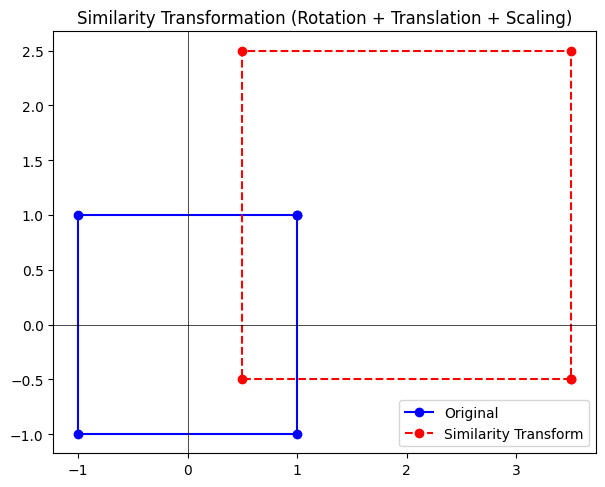

In [6]:
#@title 6. Similarity Transformations

import numpy as np
import matplotlib.pyplot as plt

# Define a square
square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Parameters
angle_deg = 90
theta = np.deg2rad(angle_deg)
k = 1.5             # scaling factor
tx, ty = 2, 1       # translation

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Similarity transformation matrix
S = np.array([[k*np.cos(theta), k*np.sin(theta), tx],
              [-k*np.sin(theta),  k*np.cos(theta), ty],
              [0, 0, 1]])

# Apply transformation
transformed_h = square_h @ S.T
similarity_result = transformed_h[:, :2]

# Plotting
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(similarity_result[:,0], similarity_result[:,1], 'r--o', label="Similarity Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Similarity Transformation (Rotation + Translation + Scaling)")
plt.gca().set_aspect('equal')
plt.show()


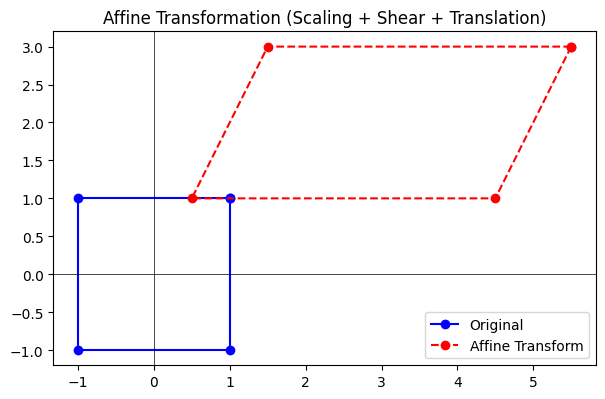

In [7]:
#@title 7. Affine Transformations

import numpy as np
import matplotlib.pyplot as plt

# Define a square
square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Affine transformation parameters
sx, sy = 2, 1      # non-uniform scaling
shear = 0.5        # shear factor
tx, ty = 3, 2      # translation

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Affine transformation matrix (general 2x3)
A = np.array([[sx, shear, tx],
              [0,   sy,   ty],
              [0,    0,    1]])

# Apply affine transformation
transformed_h = square_h @ A.T
affine_result = transformed_h[:, :2]

# Plotting
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(affine_result[:,0], affine_result[:,1], 'r--o', label="Affine Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Affine Transformation (Scaling + Shear + Translation)")
plt.gca().set_aspect('equal')
plt.show()




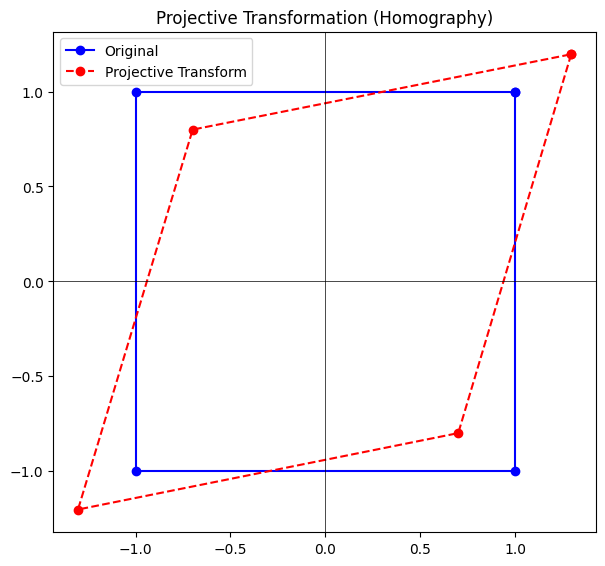

In [10]:
#@title 8. Projective Transformations
import numpy as np
import matplotlib.pyplot as plt

# Define a square
square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Example Projective Transformation matrix (Homography)
# (Last row is not [0,0,1] → makes it projective, not affine)
P = np.array([[1, 0.3, 0],
              [0.2, 1, 0],
              [0.001, 0.002, 1]])

# Apply projective transformation
transformed_h = square_h @ P.T

# Normalize by the last coordinate (w)
transformed_h /= transformed_h[:, [2]]

# Get only x, y
projective_result = transformed_h[:, :2]

# Plotting
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(projective_result[:,0], projective_result[:,1], 'r--o', label="Projective Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Projective Transformation (Homography)")
plt.gca().set_aspect('equal')
plt.show()
